## DEMO: Visualizing waves  

In [1]:
#@title Import libs

import numpy as np  
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact, interactive, Dropdown
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline
%config InlineBackend.figure_format='retina'

try:
    from google.colab import output
    output.enable_custom_widget_manager()
    print('All good to go')
except:
    print('Okay we are not in Colab just proceed as if nothing happened')

Okay we are not in Colab just proceed as if nothing happened


### Standing and traveling waves in 1D

We begin by plotting a simple periodic function using numpy and matplotlib

$$y = \sin(kx)=\sin\left(\frac{2\pi}{\lambda} x\right)$$

Here are the main steps: 

- Generate grid of points for x (lets say 1000 equiditant points between 0 and 1)
- Calcualte y values on this grid points
- Plot y vs x

In [ ]:
# Generate 1000 points between 0 and 1 for the x-axis
x = np.linspace(0.0, 1.0, 1000)

# Calculate the y-values based on the sine wave formula
L = 1 # specify wavelength
y = np.sin(2 * np.pi * x / L)

# Create the plot
plt.plot(x, y, label=f'L = {L}')

#### Now lets package this into a nice little function so we can reuse it in animations!

In [32]:
def wave1d(L=2):
    """
    Plots a 1D sine wave with a specified wavelength.

    Parameters:
    L (float): Wavelength of the sine wave. Default is 2 units.

    The function generates a sine wave of the form y = sin(2πx / L) and 
    plots it over the domain x = [0, 1]. The plot includes labeled axes, 
    a title, and a legend showing the value of L (wavelength).
    """
    
    # Generate 1000 points between 0 and 1 for the x-axis
    x = np.linspace(0.0, 1.0, 1000)
    
    # Calculate the y-values based on the sine wave formula
    y = np.sin(2 * np.pi * x / L)

    # Create the plot
    plt.plot(x, y, label=f'L = {L}')
    
    # Label the axes
    plt.xlabel('x (position)')
    plt.ylabel('y (amplitude)')
    
    # Add a title and legend
    plt.title('1D Sine Wave')
    plt.legend()
    
    # Set limits for the y-axis to improve clarity
    plt.ylim(-1, 1)
    
    # Display the plot
    plt.show()


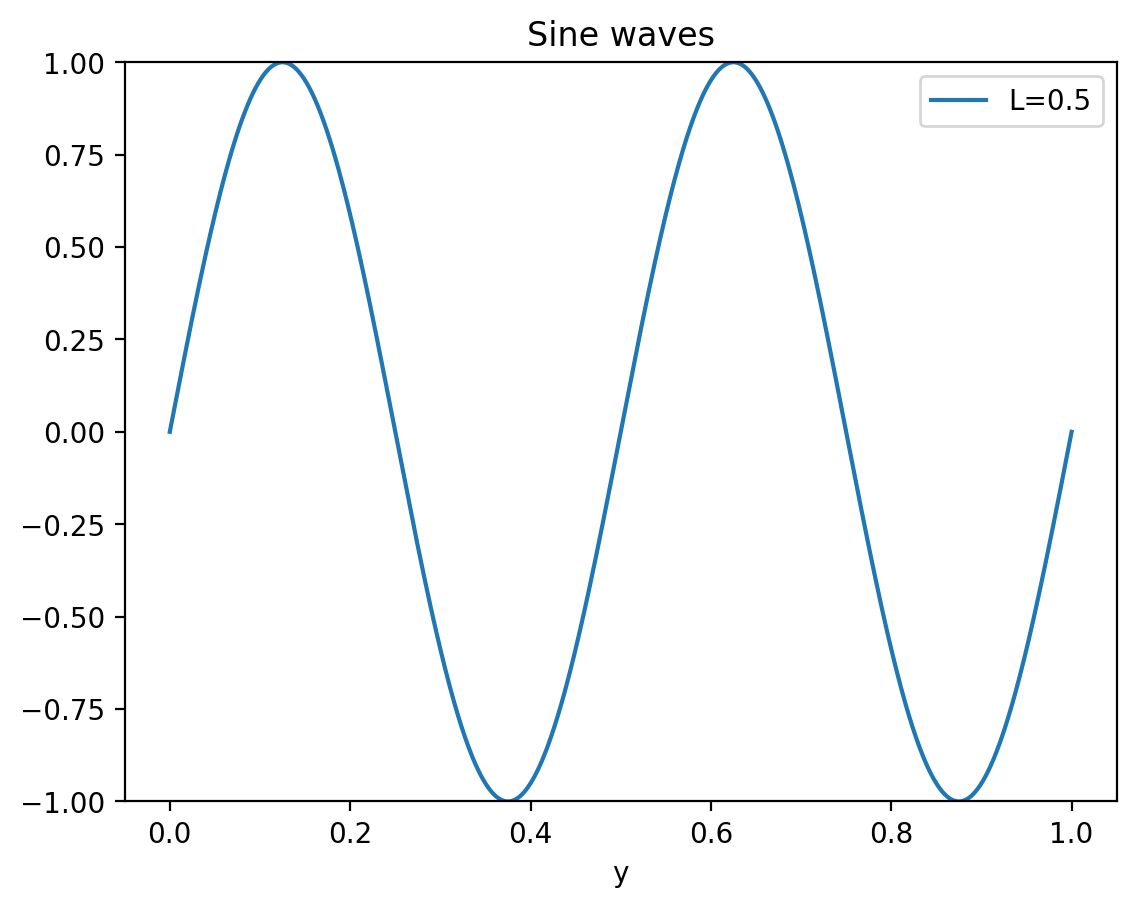

In [33]:
# Change wavelength
wave1d(L=0.5)

### Making wave functions interactive

- By adding ``@widgets.interact(parameters=(init,final))`` to our functions we can interactively parameters in the function using slider widgets.

In [34]:
interactive(wave1d, L=(0.1, 2))

interactive(children=(FloatSlider(value=2.0, description='L', max=2.0, min=0.1), Output()), _dom_classes=('wid…

## Traveling, standing waves and wave interference 

- The function generates two waves, `wave1` and `wave2`, and their superposition. 
- The waves are of the form $y = sin(k(x - vt))$ and $y = sin(k(x - vt) + \phi)$.
- where $\phi$ is the phase shift between the two. All three waveforms are plotted on the same graph.

In [35]:
def wavef2(k=10, t=0, phi=0, v=1):
    """
    Plots two traveling waves and their superposition.

    Parameters:
    k (float): Wave number (related to wavelength). Default is 10.
    t (float): Time at which to evaluate the wave. Default is 0.
    phi (float): Phase shift between the two waves. Default is 0.
    v (float): Velocity of the waves. Positive velocity moves the wave to the right. 
               Try flipping the direction of velocity (negative v) to observe standing waves.
    """
    
    # Create 1000 points between 0 and 1 for the x-axis
    x = np.linspace(0, 1., 1000)
    
    # Define the first traveling wave
    wave1 = np.sin(k * (x - v * t)) 
    
    # Define the second traveling wave with a phase shift
    wave2 = np.sin(k * (x - v * t) + phi)  # Flip v to observe a standing wave effect
    
    # Plot the two individual waves and their superposition
    plt.plot(x, wave1, lw=2, color='blue', label='Wave 1')
    plt.plot(x, wave2, lw=2, color='green', label='Wave 2')
    plt.plot(x, wave1 + wave2, lw=3, color='red', label='Wave 1 + Wave 2')
    
    # Set limits for the y-axis
    plt.ylim([-2.5, 2.5])
    
    # Add a legend and grid for clarity
    plt.legend()
    plt.grid(True)
    
    # Display the plot
    plt.show()

In [36]:
interactive(wavef2, k=(2, 20), t=(0,50.0,0.1), phi=(0, 2*np.pi, np.pi/8),v=1)

interactive(children=(IntSlider(value=10, description='k', max=20, min=2), FloatSlider(value=0.0, description=…

In [ ]:
#@title Animate traveling wave in 3D

def wave_x_t(A=1, k=1.0, omega=1, phi=0):
    # Create a grid of x and t values
    x = np.linspace(0, 2 * np.pi, 100)
    t = np.linspace(0, 2 * np.pi, 100)
    X, T = np.meshgrid(x, t)

    # Calculate the wave amplitude for each combination of x and t
    Y = A * np.sin(k * X - omega * T + phi)

    # Create the figure
    fig = go.Figure(
        data=[go.Surface(z=Y, x=X, y=T, colorscale='Viridis')],
        layout=go.Layout(
            title='Traveling Wave Animation',
            scene=dict(
                xaxis_title='Position',
                yaxis_title='Time',
                zaxis_title='Amplitude',
                camera_eye=dict(x=1.5, y=1.5, z=1.5),
            ),
            width=800,
            height=800,
            updatemenus=[dict(type='buttons', showactive=False,
                              buttons=[dict(label='Play',
                                             method='animate',
                                             args=[None, dict(frame=dict(duration=50, redraw=True), 
                                                              mode='immediate')])])]
        )
    )

    # Generate frames for the animation
    frames = []
    for phi in np.linspace(0, 2 * np.pi, 100):
        Y = A * np.sin(k * X - omega * T + phi)
        frames.append(go.Frame(data=[go.Surface(z=Y, x=X, y=T)], name=str(phi)))

    fig.frames = frames

    return fig

# Generate and show the animation
fig = wave_x_t(A=1, k=1.0, omega=1, phi=0)
fig.show()

## Normal modes of 1D guitar string

In [24]:
def guitar1d(n=1, t=0):
    """
    Visualizes the 1D normal mode of a vibrating guitar string at a specific time.

    Parameters:
    n (int): Mode number (harmonic) of the vibrating string. Default is 1.
    t (float): Time at which to evaluate the normal mode. Default is 0.
    
    The function plots the displacement of the string at time t based on the 
    normal mode solution y(x, t) = sin(n * pi * x / L) * cos(omega * t), where
    L is the length of the string (default is 1) and omega is the angular frequency.
    """
    
    # Constants
    v = 1          # Wave speed
    L = 1          # Length of the string
    omega = np.pi * v / L  # Angular frequency for the fundamental mode (n=1)
    
    # Spatial grid from 0 to L
    x = np.linspace(0, L, 1000)
    
    # Compute the displacement of the string for mode n and time t
    y = np.sin(n * np.pi * x / L) * np.cos(omega * t)
    
    # Plot the displacement of the string
    plt.plot(x, y, lw=3)
    
    # Add title, grid, and axis limits
    plt.title(f'Normal Mode #{n} of a 1D Guitar String')
    plt.grid(True, linestyle='--')
    plt.ylim(-1, 1)
    
    # Label the axes
    plt.xlabel('Position along string (x)')
    plt.ylabel('Displacement (y)')
    
    # Display the plot
    plt.show()

In [25]:
interactive(guitar1d, n=(1,10), t=(0, 10, 0.1))

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), FloatSlider(value=0.0, description='…

## 1D guitar vibrations as linear combination of normal modes

$$u(x,t) = c_1 u_1 + c_2 u_2 +c_3 u_3 + ...$$

 - $u_n = sin(n \pi x / L) \cdot cos(n \pi  v t / L)$, normal modes
 - $c_n=0-1$ coeficients of modes

In [10]:
#@title Animate mode combinations

def create_animation(modes, coefficients):
    # Parameters
    v = 1  # wave speed
    L = 1  # length of the string

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.linspace(0, L, 500)  # Reduce resolution to 500 points
    line, = ax.plot(x, np.zeros_like(x), lw=3)
    ax.set_ylim(-1.5, 1.5)

    # Update title to include selected modes
    modes_str = ', '.join(map(str, modes))
    ax.set_title(f"Combination of Normal Modes: {modes_str}")
    ax.set_xlabel("Position along the string (x)")
    ax.set_ylabel("Displacement (y)")
    ax.grid('--')

    # Animation function
    def update(frame):
        t = frame / 10  # Adjust time scaling
        y = sum(c * np.sin(n * np.pi * x / L) * np.cos(n * np.pi * v * t / L) 
                 for n, c in zip(modes, coefficients))
        line.set_ydata(y)
        return line,

    # Create the animation
    ani = FuncAnimation(fig, update, frames=np.arange(0, 50), interval=100, blit=True)  # Reduced to 50 frames
    plt.close(fig)  # Prevents static display of the last frame
    return HTML(ani.to_jshtml())

interactive(children=(IntSlider(value=1, description='n1', max=5, min=1), IntSlider(value=1, description='n2',…

In [ ]:
modes = [1, 2, 3]       # Change mode  numbers (from 1 to 10)
coefficients = [1, 1, 1] # Change their coefficients (from 0-1)

create_animation(modes, coefficients)

## Normal modes of a 2D membrane

In [57]:
def membrane2d_mode(n=1, m=1, t=0):
    """
    Calculates the 2D grid of points (X, Y) and the normal mode displacement (Z) of a vibrating 
    rectangular membrane at a specific time t.

    Parameters:
    n (int): Mode number along the x-direction. Default is 1.
    m (int): Mode number along the y-direction. Default is 1.
    t (float): Time at which to evaluate the normal mode. Default is 0.

    Returns:
    X, Y, Z (numpy arrays): Grid of points in the X-Y plane and the corresponding 
                            membrane displacement Z(X, Y, t).
    """
    
    # Constants
    Lx, Ly = 1.0, 1.0  # Dimensions of the rectangular region
    v = 0.1            # Wave speed 
    omega = v * np.pi / Lx * (n**2 + m**2)  # Angular frequency for the normal mode
    
    # Create a spatial grid
    Nx, Ny = 100, 100  # Number of grid points in each dimension
    x, y = np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    # Compute the spatial part of the normal mode
    Z = np.sin(m * np.pi * X / Lx) * np.sin(n * np.pi * Y / Ly) * np.cos(omega * t)
    
    return X, Y, Z

def viz_membrane2d_plotly(n=1, m=1, t=0): 
    """
    Visualizes the 2D normal modes of a vibrating membrane on a square geometry using Plotly.
    
    This function displays both a 2D contour plot and a 3D surface plot of the membrane displacement.

    Parameters:
    n (int): Mode number along the x-direction. Default is 1.
    m (int): Mode number along the y-direction. Default is 1.
    t (float): Time at which to evaluate the normal mode. Default is 0.
    """
    
    # Get the membrane displacement at time t
    X, Y, Z = membrane2d_mode(n, m, t)
    
    # Create a Plotly subplot with 2 views: 2D contour and 3D surface
    fig = make_subplots(
        rows=1, 
        cols=2, 
        subplot_titles=('2D Contour Plot', '3D Surface Plot'),
        specs=[[{"type": "contour"}, {"type": "surface"}]]
    )
    
    # Add 2D contour plot to the left side
    fig.add_trace(
        go.Contour(x=X.flatten(), y=Y.flatten(), z=Z.flatten(), colorscale='RdBu'),
        row=1, col=1
    )

    # Add 3D surface plot to the right side
    fig.add_trace(
        go.Surface(x=X, y=Y, z=Z, colorscale='RdBu'),
        row=1, col=2
    )

    # Update the layout for better visualization
    fig.update_layout(
        title_text="2D Contour and 3D Surface Plots of Membrane Vibrational Normal Modes",
        width=1000,
        height=500
    )
    
    # Show the figure
    fig.show()

In [64]:
interact(viz_membrane2d_plotly, n=(1,10), m=(1,10), t=(0,100))

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), IntSlider(value=1, description='m', …

<function __main__.viz_membrane2d_plotly(n=1, m=1, t=0)>